In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os,sys
import pylab as plt
%matplotlib inline

import glob


In [2]:
src_dir = '../src'
sys.path.append(src_dir)
from jsd import jsdalpha

In [3]:
src_meta = '../../gutenberg/src/'
sys.path.append(src_meta)
from metaquery import meta_query


In [4]:
# Load meta data

In [5]:
meta=meta_query(path=src_meta+'../metadata/metadata.csv')

# Subjects

In [6]:
Smax = 20

meta.reset()
meta.filter_lang('en')
subjects=meta.get_subjects_counts()


list_subjects = []
for s,n_s in subjects.most_common(Smax):
    print(s,n_s)
    list_subjects+=[s]

Short stories 1455
Fiction 1280
Science fiction 1271
Adventure stories 769
Love stories 613
Conduct of life -- Juvenile fiction 608
Detective and mystery stories 559
English wit and humor -- Periodicals 555
Historical fiction 497
Poetry 446
Western stories 422
Man-woman relationships -- Fiction 398
England -- Fiction 349
Friendship -- Juvenile fiction 317
Young women -- Fiction 291
Domestic fiction 290
Humorous stories 277
Adventure and adventurers -- Juvenile fiction 255
Christian life -- Juvenile fiction 255
English fiction -- 19th century 248


In [7]:
print(list_subjects)

['Short stories', 'Fiction', 'Science fiction', 'Adventure stories', 'Love stories', 'Conduct of life -- Juvenile fiction', 'Detective and mystery stories', 'English wit and humor -- Periodicals', 'Historical fiction', 'Poetry', 'Western stories', 'Man-woman relationships -- Fiction', 'England -- Fiction', 'Friendship -- Juvenile fiction', 'Young women -- Fiction', 'Domestic fiction', 'Humorous stories', 'Adventure and adventurers -- Juvenile fiction', 'Christian life -- Juvenile fiction', 'English fiction -- 19th century']


In [8]:
list_subjects += ['All']
list_books = []

lang = 'en'
for s in list_subjects:
    meta.reset()
    meta.filter_lang(lang,how='only')
    if s=='All':
        pass
    else:
        meta.filter_subject(s,how='any')
    books_tmp = meta.get_ids()
    list_books += [books_tmp]

In [9]:
[len(h) for h in list_books]

[1484,
 1281,
 1276,
 775,
 618,
 657,
 559,
 555,
 509,
 446,
 424,
 399,
 350,
 320,
 291,
 292,
 280,
 257,
 260,
 248,
 45469]

In [10]:
arr_alpha = np.array([0.0,1.0,2.0])
Npair = 500
weights = False ## standard 1/2,1.2
normalized = True ## 0<=divergence <=1

path_read = '../../gutenberg/data/counts/'

list_jsdalpha = []
list_labels = []
for i_s,s in enumerate(list_subjects):
    print(s)
    list_jsd_tmp = []
    books_tmp=list_books[i_s]
    for i_Npair in range(Npair):
        
        book_sel = True
        while book_sel== True:

            pg1,pg2 = np.random.choice(books_tmp,replace=False,size=2)
            fname_read = '%s_counts.txt'%(pg1)
            filename1 = os.path.join(path_read,fname_read)

            fname_read = '%s_counts.txt'%(pg2)
            filename2 = os.path.join(path_read,fname_read)
            
            if os.path.isfile(filename1) and os.path.isfile(filename2):
                book_sel = False
        jsd = jsdalpha(filename1,filename2,alpha=arr_alpha,weights=weights,normalized=normalized)
        list_jsd_tmp += [jsd]
    list_jsdalpha += [list_jsd_tmp]

Short stories
Fiction
Science fiction
Adventure stories
Love stories
Conduct of life -- Juvenile fiction
Detective and mystery stories
English wit and humor -- Periodicals
Historical fiction
Poetry
Western stories
Man-woman relationships -- Fiction
England -- Fiction
Friendship -- Juvenile fiction
Young women -- Fiction
Domestic fiction
Humorous stories
Adventure and adventurers -- Juvenile fiction
Christian life -- Juvenile fiction
English fiction -- 19th century
All


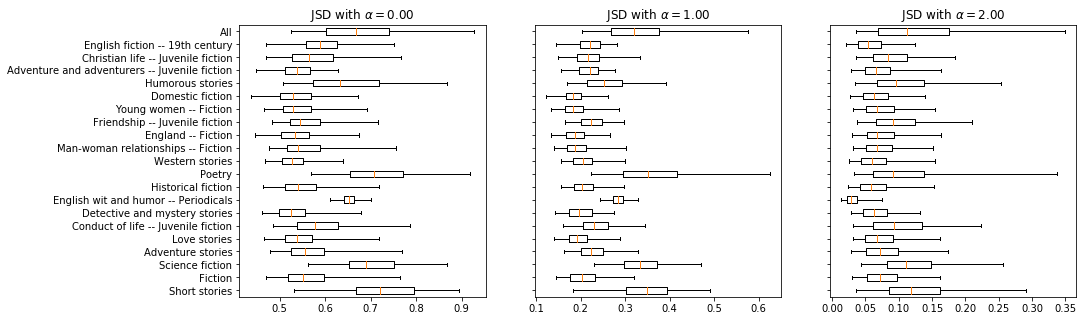

In [12]:
f=plt.figure(figsize = (15,5))
for i_alpha,alpha in enumerate(arr_alpha):
    ax=f.add_subplot(1,3,i_alpha+1)
    list_jsd_plot = [ [h[i_alpha] for h in jsd_tmp] for jsd_tmp in list_jsdalpha ]

    _ =ax.boxplot(list_jsd_plot,vert=False,whis=[2.5,97.5],labels=list_subjects,sym='')
    _ = ax.set_title(r'JSD with $\alpha = %.2f$'%(alpha))
    
    if i_alpha>0:
        ax.set_yticklabels([])
#     ax.set_xlim(0,1)